In [3]:
import pandas as pd
import numpy as np
import glob, sys, os, time , itertools , warnings , re , json
from bs4 import BeautifulSoup
from tqdm import tqdm
import matplotlib.pyplot as plt
import multiprocessing as mp
# from DataProcessing import 
import uszipcode , pickle 
from TempFolder.TempFolder import Temp

warnings.filterwarnings('ignore')

In [4]:
with open('nogit\\path','r') as f:
    path_to_csv = f.read()
path_to_processed_csv =path_to_csv + 'SC-csv\\'
Temp.set_path(path_to_csv +'SC-temp\\')
path_to_temp_csv = path_to_csv+'SC-working-folder\\'
colummn_names = ['Description'
                 ,'Title State/Type'
                 ,'Location'
                 ,'null'
                 ,'Auction Date'
                 ,'Actual Cash Value'
                 ,'Repair Cost'
                 ,'Odometer'
                 ,'Prim Damage'
                 ,'Sec Damage'
                 ,'Price Sold or Highest Bid']
path_to_makes = glob.glob(path_to_csv+'Cars\\*')
search = uszipcode.SearchEngine(simple_zipcode=True)
path_to_all_years = list(itertools.chain.from_iterable([glob.glob(path+'\\*') for path in path_to_makes]))
search = uszipcode.SearchEngine(simple_zipcode=True)



In [3]:
# #%%time
# '''
# Parse the HTML files
# '''

# #
# #Read and parse scraped .html files 
# def process_files(path_to_years__):
#     res_df = pd.DataFrame()
#     #for each make/year folder get a list of all .html files
#     #for path_to__year in tqdm(path_to_years__):
#     for path_to__year in path_to_years__:
#         try:
#             #list of all html
#             path_to_make_years = glob.glob(path_to__year+'/*')

#             #for each .html in the folder
#             for file_path in path_to_make_years:
#             #file_path = path_to_make_years[0]
            
#                 #read file and load to the BS object
#                 with open(file_path, 'r') as f:
#                     fle = f.read()
#                 soup = BeautifulSoup(fle)

#                 rows = []
#                 line_ind = 0 
                
#                 #filter all div elements (div table)
#                 for div in soup.find_all('div',['row']):
#                     row = div.text.strip()
#                     #print(row)
#                     try:
#                         line_dict = {}
#                         i = 0
                        
#                         #clean each element and map to respected column
#                         for line in row.replace('\t','').replace('\xa0','').split('\n'):
#                             line_dict[colummn_names[i]]= line.replace('Location:','').replace('Title State/Type:','').strip()
#                             i+=1
#                         rows.append(line_dict)
#                     except Exception as e:
#                         #print(line_ind,'-',e)
#                         pass
#                     finally:
#                         line_ind+=1

#                 page_df = pd.DataFrame(rows).iloc[3:,:-1]
#                 page_df_ext = page_df.join(page_df['Description'].str.split(' ',expand=True).rename(columns={0:'Year',1:'Make',2:'Model',3:'Model 2',4:'Model 3'}))
#                 page_df_ext = page_df_ext.join(page_df_ext['Location'].str.split('-',expand=True).rename(columns={0:'State',1:'City'}))
#                 page_df_ext['City'] = page_df_ext['City'].str.strip().str.capitalize()
#                 page_df_ext['State'] = page_df_ext['State'].str.strip()
#                 res_df = res_df.append(page_df_ext,ignore_index=True,sort=False)
#                 del rows , page_df_ext , page_df
#         except:
#             continue
#     return res_df


# if __name__ == '__main__':
#     print('# files to concat' , len(path_to_all_years))
#     NCPU = mp.cpu_count()
#     print('Creating pool with ', NCPU,' CPUs')
#     pool = mp.Pool(processes=4)
#     # if not os.path.exists(path_to_processed_csv):
#     #     print('Creating output folder')
#     #     os.makedirs(path_to_processed_csv)
    
#     by_chunk_path_to_all_years = np.array_split(path_to_all_years,len(path_to_all_years) // NCPU )
#     start_ = 0
#     end_ = len(by_chunk_path_to_all_years)
#     for i in range(start_,end_):
#         print('Starting with chunk: ',i,' of ',end_)
#         path_to_all_years_split = np.array_split(by_chunk_path_to_all_years[i],NCPU)
#         ress = pool.map(process_files,path_to_all_years_split)
#         ress_df = pd.concat(ress)
#         print('Chunk ',i,' is done.')
#         ress_df.to_csv(path_to_processed_csv+'sc_'+str(i)+'.csv',index=False)
# #         i+=1
# #         if i ==2:
# #             break
#     pool.close()
#     pool.join()
#     print('all work is done')
    

In [4]:
#Read parsed files
outputs = glob.glob(path_to_processed_csv+'*')
out_l = []
errs = []
for output in tqdm(outputs):
    try:
#     print(output)
        out_l.append(pd.read_csv(output))
    except:
        errs.append(output)
out_df = pd.concat(out_l,ignore_index=True,sort=False)

if len(errs) >0:
    print('Errors:', errs)

100%|██████████| 321/321 [00:03<00:00, 90.07it/s]
Errors: ['c:\\data\\Datasets\\SC-csv\\sc_0.csv', 'c:\\data\\Datasets\\SC-csv\\sc_1.csv', 'c:\\data\\Datasets\\SC-csv\\sc_2.csv', 'c:\\data\\Datasets\\SC-csv\\sc_3.csv', 'c:\\data\\Datasets\\SC-csv\\sc_4.csv', 'c:\\data\\Datasets\\SC-csv\\sc_5.csv', 'c:\\data\\Datasets\\SC-csv\\sc_6.csv', 'c:\\data\\Datasets\\SC-csv\\sc_7.csv']


In [5]:
print(out_df.columns)

row_size = out_df.shape[0]

print('Raw dataset size: ',row_size)


out_df.head(50)


Index(['Actual Cash Value', 'Auction Date', 'Description', 'Location',
       'Odometer', 'Price Sold or Highest Bid', 'Prim Damage', 'Repair Cost',
       'Sec Damage', 'Title State/Type', 'Year', 'Make', 'Model', 'Model 2',
       'State', 'City', 'Model 3', '2', '5'],
      dtype='object')
Raw dataset size:  1048104


,Actual Cash Value,Auction Date,Description,Location,Odometer,Price Sold or Highest Bid,Prim Damage,Repair Cost,Sec Damage,Title State/Type,Year,Make,Model,Model 2,State,City,Model 3,2,5
0,"$ 5,649 USD",10/02/2019,1992 Acura INTEGRA GS,KY - LEXINGTON WEST,146073 A,"$ 3,750 USD",Front end,NaN,NaN,FL RB,1992,Acura,INTEGRA,GS,KY,Lexington west,NaN,NaN,NaN
1,NaN,06/18/2019,1992 Acura INTEGRA LS,CA - SAN JOSE,182250 E,$ 300 USD,Minor dent/scratches,NaN,NaN,CA CQ,1992,Acura,INTEGRA,LS,CA,San jose,NaN,NaN,NaN
2,NaN,05/24/2019,1992 Acura VIGOR GS,NJ - SOMERVILLE,188301 A,$ 575 USD,Front end,NaN,Mechanical,NJ CT,1992,Acura,VIGOR,GS,NJ,Somerville,NaN,NaN,NaN
3,$ 725 USD,11/26/2018,1992 Acura INTEGRA GS,WA - NORTH SEATTLE,300930 E,$ 325 USD,Front end,NaN,Mechanical,WA CT,1992,Acura,INTEGRA,GS,WA,North seattle,NaN,NaN,NaN
4,"$ 1,450 USD",09/12/2018,1992 Acura INTEGRA LS,NY - LONG ISLAND,260216 E,$ 300 USD,Front end,NaN,NaN,NY CT,1992,Acura,INTEGRA,LS,NY,Long island,NaN,NaN,NaN
5,"$ 3,250 USD",12/20/2017,1992 Acura VIGOR GS,CA - MARTINEZ,205852 E,$ 175 USD,Minor dent/scratches,NaN,Side,CA DQ,1992,Acura,VIGOR,GS,CA,Martinez,NaN,NaN,NaN
6,NaN,12/08/2016,1992 Acura LEGEND L,MN - MINNEAPOLIS,144195 E,$ 125 USD,MECHANICAL,NaN,HAIL,MN CT,1992,Acura,LEGEND,L,MN,Minneapolis,NaN,NaN,NaN
7,"$ 1,960 USD",09/13/2016,1992 Acura INTEGRA LS,TN - KNOXVILLE,309149 E,$ 975 USD,SIDE,NaN,NaN,TN CT,1992,Acura,INTEGRA,LS,TN,Knoxville,NaN,NaN,NaN
8,NaN,07/25/2016,1992 Acura LEGEND LS,MD - BALTIMORE,104173 A,$ 150 USD,MINOR DENT/SCRATCHES,NaN,NORMAL WEAR,MD CT,1992,Acura,LEGEND,LS,MD,Baltimore,NaN,NaN,NaN
9,NaN,07/19/2016,1992 Acura LEGEND L,NJ - GLASSBORO EAST,131385 A,$ 200 USD,NORMAL WEAR,NaN,NaN,NJ CT,1992,Acura,LEGEND,L,NJ,Glassboro east,NaN,NaN,NaN


In [6]:
#clean up wrong values 
out_df = out_df.loc[~out_df['Actual Cash Value'].str.contains('Odometer').fillna(False)]
out_df = out_df.loc[~out_df['Year'].str.contains('Make').fillna(False)]
out_df = out_df.loc[~out_df['Year'].str.contains('Model:').fillna(False)]
out_df = out_df.loc[~out_df['Auction Date'].str.contains('Repair Cost').fillna(False)]


#filter out canadian cars
out_df = out_df.loc[~out_df['Price Sold or Highest Bid'].str.contains('CA').fillna(False)
                               ]

out_df['Auction Date'] = pd.to_datetime(out_df['Auction Date'])

out_df['Auction_Year'] = out_df['Auction Date'].dt.year

In [7]:
cleaned_size = out_df.shape[0]
print('Cleaned dataset size:',cleaned_size
      ,'\nRows removed: ', row_size - cleaned_size)


Cleaned dataset size: 1046013 
Rows removed:  2091


In [8]:
# # out_df.to_csv(path_to_processed_csv+'SC-countymap.csv',index=False)

# # out_df = pd.read_csv(path_to_processed_csv+'SC-countymap.csv')

# from DataProcessing.DataStats import get_df_stats

# get_df_stats(out_df)

In [9]:
# Combining Prim Damages 
raw_prim_cat = out_df['Prim Damage'].str.lower().unique()
print('Cat count:',raw_prim_cat.shape[0],'\n',raw_prim_cat)

Cat count: 33 
 ['front end' 'minor dent/scratches' 'mechanical' 'side' 'normal wear'
 'hail' 'minor dents/scratche' 'stripped' 'all over' 'damage history'
 'partial/incomplete r' 'rear end' 'vandalism' 'water/flood' 'burn'
 'previous repair' 'partial repair' 'top/roof' 'rollover'
 'burn - interior' 'undercarriage' 'biohazard/chemical' 'burn - engine'
 'frame damage' 'missing/altered vin' 'unknown' 'frame damage reporte'
 'replaced vin' 'rejected repair' 'biohazardous/chemica' nan
 'cash for clunkers' 'rr']


In [10]:
prim_damage_map = {
 'burn - engine': 'burn'
, 'partial/incomplete r' : 'partial repair'
, 'frame damage reporte' : 'frame damage'

,'unknown' : 'no data'


, np.nan : 'no data'
,'price sold or highest bid' :'no data'
,'rr' : 'no data'

}
out_df['Prim Damage'] = out_df['Prim Damage'].str.lower().replace(prim_damage_map)

In [11]:
new_prim_cat = out_df['Prim Damage'].str.lower().unique()
print('Cat count:',new_prim_cat.shape[0],'\n',new_prim_cat)

Cat count: 28 
 ['front end' 'minor dent/scratches' 'mechanical' 'side' 'normal wear'
 'hail' 'minor dents/scratche' 'stripped' 'all over' 'damage history'
 'partial repair' 'rear end' 'vandalism' 'water/flood' 'burn'
 'previous repair' 'top/roof' 'rollover' 'burn - interior' 'undercarriage'
 'biohazard/chemical' 'frame damage' 'missing/altered vin' 'no data'
 'replaced vin' 'rejected repair' 'biohazardous/chemica'
 'cash for clunkers']


In [12]:
# out_df = out_df.join(out_df['Location'].str.split('-',expand=True).rename(columns={0:'State',1:'City'}))

In [13]:
#fix numerical values
def alter_sting(x):    
    try:
        return float(re.sub('[\$,USD,\, ,E,A,N]','',x))
    except:
#         print(x)
        return np.nan


out_df['Actual Cash Value'] = (out_df['Actual Cash Value']
                               #.fillna(-1)
                               .map(alter_sting))
out_df['Repair Cost'] = (out_df['Repair Cost']
#                          .fillna(-1)
                         .map(alter_sting))

out_df['Price Sold or Highest Bid'] = (out_df['Price Sold or Highest Bid']
                                       #.fillna(-1)
                                       .map(alter_sting))
out_df['Year'] = (out_df['Year']
#                   .fillna(-1)
                  .map(float))

out_df = out_df.rename(columns={'Year':'Model_Year'
                               })
                               #.assign(Model_Year = lambda x: int(x))#pd.to_datetime(x['Model_Year']#.astype(int).astype(str))
                      

out_df['City'] = out_df['City'].str.strip().str.capitalize()
out_df['State'] = out_df['State'].str.strip().str.upper()
out_df['Model_short'] = out_df['Model'].astype('str')
out_df['Model'] = out_df['Model'].astype('str') + ' '+out_df['Model 2'].astype('str').fillna('') + ' ' + out_df['Model 3'].fillna('').astype('str')
out_df['Make'] = out_df['Make'].str.strip().str.upper()
out_df['Model'] = out_df['Model'].str.strip().str.upper()
out_df['Model_short'] = out_df['Model_short'].str.strip().str.upper()

#rename variables - add _ where needed

out_df = out_df.rename({'Price Sold or Highest Bid':'Price_Sold_or_Highest_Bid'
                            ,'Repair Cost':'Repair_Cost'
                            ,'Actual Cash Value':'Actual_Cash_Value'
                            ,'Prim Damage':'Prim_Damage'
                            ,'Sec Damage':'Sec_Damage'
                            ,'Title State/Type':'Title_State_Type'
                            ,'Auction Date':'Auction_Date'
                            },axis=1)



# out_df['Auction_Date'] = out_df['Auction_Date'].dt.year
out_df['Model_Year'] = out_df['Model_Year'].astype(int)

#remove columns 

out_df = out_df.drop(columns=['Model 2','Model 3', '2', '5'])


print('New columns names:',out_df.columns)

New columns names: Index(['Actual_Cash_Value', 'Auction_Date', 'Description', 'Location',
       'Odometer', 'Price_Sold_or_Highest_Bid', 'Prim_Damage', 'Repair_Cost',
       'Sec_Damage', 'Title_State_Type', 'Model_Year', 'Make', 'Model',
       'State', 'City', 'Auction_Year', 'Model_short'],
      dtype='object')


In [14]:
out_df.head()

,Actual_Cash_Value,Auction_Date,Description,Location,Odometer,Price_Sold_or_Highest_Bid,Prim_Damage,Repair_Cost,Sec_Damage,Title_State_Type,Model_Year,Make,Model,State,City,Auction_Year,Model_short
0,5649.0,2019-10-02,1992 Acura INTEGRA GS,KY - LEXINGTON WEST,146073 A,3750.0,front end,NaN,NaN,FL RB,1992,ACURA,INTEGRA GS,KY,Lexington west,2019,INTEGRA
1,NaN,2019-06-18,1992 Acura INTEGRA LS,CA - SAN JOSE,182250 E,300.0,minor dent/scratches,NaN,NaN,CA CQ,1992,ACURA,INTEGRA LS,CA,San jose,2019,INTEGRA
2,NaN,2019-05-24,1992 Acura VIGOR GS,NJ - SOMERVILLE,188301 A,575.0,front end,NaN,Mechanical,NJ CT,1992,ACURA,VIGOR GS,NJ,Somerville,2019,VIGOR
3,725.0,2018-11-26,1992 Acura INTEGRA GS,WA - NORTH SEATTLE,300930 E,325.0,front end,NaN,Mechanical,WA CT,1992,ACURA,INTEGRA GS,WA,North seattle,2018,INTEGRA
4,1450.0,2018-09-12,1992 Acura INTEGRA LS,NY - LONG ISLAND,260216 E,300.0,front end,NaN,NaN,NY CT,1992,ACURA,INTEGRA LS,NY,Long island,2018,INTEGRA


In [15]:
#format odometer data

#for null model - replace all E  & N values into "No Data" (np.nan)

def odometer_null(x):
    if 'E' in x or 'N' in x:
        return np.nan
    else:
        return alter_sting(x)


    
#create a dictionary for max E value for each model 

odometr_dict = (out_df.loc[out_df['Odometer'].str.contains('A')]
                 .assign(odometer_num = lambda x: x['Odometer'].map(alter_sting)
                        )
                 .groupby('Description')['odometer_num']
                 .max()
                #  [['Odometer','odometer_num']]
                )

#replace E and N values into max of A category
def odometer_replace(x):
    if 'E' in x['Odometer'] or 'N' in x['Odometer']:
        try:
            return odometr_dict[x['Description']]
        except:
            return np.nan
    else:
        return alter_sting(x['Odometer'])


#create null model
out_df = out_df.assign(Odometer_Null = lambda x: x['Odometer'].map(odometer_null))

#create replace model:

out_df = out_df.assign(Odometer_Replace = lambda x: x.apply(odometer_replace,axis=1))


# create Model_Age
# current_year = 2019
out_df['Model_Age'] = (out_df['Auction_Year'] - out_df['Model_Year'] ) + 1 #.dt.days // 365 
# out_df['Model_Year'] = out_df['Model_Year'].dt.year

In [16]:
out_df.tail()

,Actual_Cash_Value,Auction_Date,Description,Location,Odometer,Price_Sold_or_Highest_Bid,Prim_Damage,Repair_Cost,Sec_Damage,Title_State_Type,Model_Year,Make,Model,State,City,Auction_Year,Model_short,Odometer_Null,Odometer_Replace,Model_Age
1048099,21521.0,2016-08-15,2016 Nissan ROGUE S/SL,FL - JACKSONVILLE EAST,0 N,4900.0,front end,20642.00,BIOHAZARD/CHEMICAL,FL CD,2016,NISSAN,ROGUE S/SL,NaN,NaN,2016,ROGUE,NaN,49819.0,1
1048100,NaN,2016-08-12,2016 Nissan ALTIMA 2.5,AZ - TUCSON,1939 A,6900.0,front end,NaN,NaN,AZ SC,2016,NISSAN,ALTIMA 2.5,NaN,NaN,2016,ALTIMA,1939.0,1939.0,1
1048101,21208.0,2016-08-12,2016 Nissan ROGUE S/SL,TX - HOUSTON,11051 A,2500.0,all over,26661.32,UNDERCARRIAGE,TX SV,2016,NISSAN,ROGUE S/SL,NaN,NaN,2016,ROGUE,11051.0,11051.0,1
1048102,18340.0,2016-08-12,2016 Nissan SENTRA S/S,IL - CHICAGO SOUTH,2607 N,2500.0,front end,22830.00,UNDERCARRIAGE,IL SC,2016,NISSAN,SENTRA S/S,NaN,NaN,2016,SENTRA,NaN,79448.0,1
1048103,18000.0,2016-08-11,2016 Nissan SENTRA S/S,PA - PITTSBURGH NORTH,1742 A,4900.0,front end,NaN,NaN,PA SC,2016,NISSAN,SENTRA S/S,NaN,NaN,2016,SENTRA,1742.0,1742.0,1


In [17]:
%%time
# i = 6
# city = out_df.loc[i,'City']
# state =out_df.loc[i,'State']
# city, state

# geo_found = search.by_city_and_state(city,state)[0]

# geo_found.county , geo_found.state


def find_county(x):
    try:
        return search.by_city_and_state(x[1] , x[0])[0].county
    except:
        return 'None'


locs = out_df['Location'].unique()
locs = locs[~pd.isnull(locs)]

state_city = [l[:2] for l in  list(map(lambda x: x.split(' - '),   locs ) ) #if len(l)>1
             ]





county = list(map(find_county,   state_city ) )

county = [', '.join([l.strip() for l in (county[i].replace('County','')+', '+state_city[i][0]).split(',') ])
 for i in range(len(county))]

loc_lookup = pd.DataFrame({'Location':locs,'County':county}).set_index('Location')['County']

loc_lookup


def map_countries(x):
    try:
        return loc_lookup.loc[x]
    except:
        return 'None'
        
out_df['County'] = out_df['Location'].map(map_countries)
out_df['make_key'] = out_df.assign(Model_Year = lambda x: x['Model_Year'].astype(str))[['Make','Model_short','Model_Year']].agg('_'.join,axis=1)



out_df.head(10)

Wall time: 1min 59s


,Actual_Cash_Value,Auction_Date,Description,Location,Odometer,Price_Sold_or_Highest_Bid,Prim_Damage,Repair_Cost,Sec_Damage,Title_State_Type,...,Model,State,City,Auction_Year,Model_short,Odometer_Null,Odometer_Replace,Model_Age,County,make_key
0,5649.0,2019-10-02,1992 Acura INTEGRA GS,KY - LEXINGTON WEST,146073 A,3750.0,front end,NaN,NaN,FL RB,...,INTEGRA GS,KY,Lexington west,2019,INTEGRA,146073.0,146073.0,28,"Fayette, KY",ACURA_INTEGRA_1992
1,NaN,2019-06-18,1992 Acura INTEGRA LS,CA - SAN JOSE,182250 E,300.0,minor dent/scratches,NaN,NaN,CA CQ,...,INTEGRA LS,CA,San jose,2019,INTEGRA,NaN,178757.0,28,"Santa Clara, CA",ACURA_INTEGRA_1992
2,NaN,2019-05-24,1992 Acura VIGOR GS,NJ - SOMERVILLE,188301 A,575.0,front end,NaN,Mechanical,NJ CT,...,VIGOR GS,NJ,Somerville,2019,VIGOR,188301.0,188301.0,28,"Somerset, NJ",ACURA_VIGOR_1992
3,725.0,2018-11-26,1992 Acura INTEGRA GS,WA - NORTH SEATTLE,300930 E,325.0,front end,NaN,Mechanical,WA CT,...,INTEGRA GS,WA,North seattle,2018,INTEGRA,NaN,197187.0,27,"King, WA",ACURA_INTEGRA_1992
4,1450.0,2018-09-12,1992 Acura INTEGRA LS,NY - LONG ISLAND,260216 E,300.0,front end,NaN,NaN,NY CT,...,INTEGRA LS,NY,Long island,2018,INTEGRA,NaN,178757.0,27,"Queens, NY",ACURA_INTEGRA_1992
5,3250.0,2017-12-20,1992 Acura VIGOR GS,CA - MARTINEZ,205852 E,175.0,minor dent/scratches,NaN,Side,CA DQ,...,VIGOR GS,CA,Martinez,2017,VIGOR,NaN,216614.0,26,"Contra Costa, CA",ACURA_VIGOR_1992
6,NaN,2016-12-08,1992 Acura LEGEND L,MN - MINNEAPOLIS,144195 E,125.0,mechanical,NaN,HAIL,MN CT,...,LEGEND L,MN,Minneapolis,2016,LEGEND,NaN,233596.0,25,"Hennepin, MN",ACURA_LEGEND_1992
7,1960.0,2016-09-13,1992 Acura INTEGRA LS,TN - KNOXVILLE,309149 E,975.0,side,NaN,NaN,TN CT,...,INTEGRA LS,TN,Knoxville,2016,INTEGRA,NaN,178757.0,25,"Knox, TN",ACURA_INTEGRA_1992
8,NaN,2016-07-25,1992 Acura LEGEND LS,MD - BALTIMORE,104173 A,150.0,minor dent/scratches,NaN,NORMAL WEAR,MD CT,...,LEGEND LS,MD,Baltimore,2016,LEGEND,104173.0,104173.0,25,"Baltimore city, MD",ACURA_LEGEND_1992
9,NaN,2016-07-19,1992 Acura LEGEND L,NJ - GLASSBORO EAST,131385 A,200.0,normal wear,NaN,NaN,NJ CT,...,LEGEND L,NJ,Glassboro east,2016,LEGEND,131385.0,131385.0,25,"Gloucester, NJ",ACURA_LEGEND_1992


In [18]:
# cpi adj original data
base_year = 2010
def cpi_adj_Actual_Cash_Value(x):
    try:
        
        return round((cpi_df[base_year] / cpi_df[x['Auction_Year']]) * x['Actual_Cash_Value'],2)
    except:
        return x['Actual_Cash_Value']


out_df['Actual_Cash_Value_adj'] = out_df.apply(cpi_adj_Actual_Cash_Value
                                            ,axis=1)



def cpi_adj_Price_Sold_or_Highest_Bid(x):
    try:
        
        return round((cpi_df[base_year] / cpi_df[x['Auction_Year']]) * x['Price_Sold_or_Highest_Bid'],2)
    except:
        return x['Price_Sold_or_Highest_Bid']


out_df['Price_Sold_or_Highest_Bid_adj'] = out_df.apply(cpi_adj_Price_Sold_or_Highest_Bid
                                            ,axis=1)

def cpi_adj_Repair_Cost(x):
    try:
        
        return round((cpi_df[base_year] / cpi_df[x['Auction_Year']]) * x['Repair_Cost'],2)
    except:
        return x['Repair_Cost']

out_df['Repair_Cost_adj'] = out_df.apply(cpi_adj_Repair_Cost
                                            ,axis=1)

out_df['make_key'] = out_df.assign(Model_Year = lambda x: x['Model_Year'].astype(str))[['Make','Model_short','Model_Year']].agg('_'.join,axis=1)

#out_df['Make'].value_counts().to_dict()#.to_string()


In [19]:
out_df.columns

Index(['Actual_Cash_Value', 'Auction_Date', 'Description', 'Location',
       'Odometer', 'Price_Sold_or_Highest_Bid', 'Prim_Damage', 'Repair_Cost',
       'Sec_Damage', 'Title_State_Type', 'Model_Year', 'Make', 'Model',
       'State', 'City', 'Auction_Year', 'Model_short', 'Odometer_Null',
       'Odometer_Replace', 'Model_Age', 'County', 'make_key',
       'Actual_Cash_Value_adj', 'Price_Sold_or_Highest_Bid_adj',
       'Repair_Cost_adj'],
      dtype='object')

In [8]:
# Temp.save_obj(out_df, 'out_df_working')

out_df = Temp.load_obj('out_df_working')

Object <out_df_working> loaded from: c:\data\Datasets\SC-temp\


In [21]:
'''
END OF MAIN DATASET PREPROCESSING
'''

'\nEND OF MAIN DATASET PREPROCESSING\n'

In [9]:
'''
JOINING WITH DEMOGRAPHIC DATA 
'''


#read the demography data `

path_to_demograpyh =path_to_csv+'SC-working-folder\\demography.csv'

demog = pd.read_csv(path_to_demograpyh)

print('Demographic features:\n' , demog.columns.tolist())



Demographic features:
 ['index', 'Unemp-Pct-2014', 'Unemp-Pct-2015', 'Unemp-Pct-2016', 'Unemp-Pct-2017', 'Unemp-Pct-2018', 'Unemp-Pct-2013', 'Unemp-Pct-2012', 'Unemp-Pct-2011', 'Unemp-Pct-2010', 'Income_adj-1990', 'Income_adj-1991', 'Income_adj-1992', 'Income_adj-1993', 'Income_adj-1994', 'Income_adj-1995', 'Income_adj-1996', 'Income_adj-1997', 'Income_adj-1998', 'Income_adj-1999', 'Income_adj-2000', 'Income_adj-2001', 'Income_adj-2002', 'Income_adj-2003', 'Income_adj-2004', 'Income_adj-2005', 'Income_adj-2006', 'Income_adj-2007', 'Income_adj-2008', 'Income_adj-2009', 'Income_adj-2010', 'Income_adj-2011', 'Income_adj-2012', 'Income_adj-2013', 'Income_adj-2014', 'Income_adj-2015', 'Income_adj-2016', 'Income_adj-2017', 'CENSUS2010', 'ESTIMATESBASE2010', 'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'GRNDTOT_2009', 'GRNDTOT_2010', 'GRNDTOT_2011', 'GRNDTOT_2012', 'GR

In [10]:

#read carfax data
path_to_carfax =path_to_csv+'SC-carfax\\processed\\MSRP.csv'

carfax = pd.read_csv(path_to_carfax,index_col=0) 

#CPI Data
path_to_cpi = path_to_csv+'US-CPI\\SeriesReport-20191118124049_549fff.xlsx'
cpi_df = pd.read_excel(path_to_cpi,skiprows=11,index_col=0)['Annual'][:-2]; cpi_df


#read carfax data
path_to_carfax =path_to_csv+'SC-carfax\\processed\\MSRP.csv'

carfax = pd.read_csv(path_to_carfax,index_col=0) 
carfax['make'] = carfax['make'].str.upper()
carfax['model'] = carfax['model'].str.upper()
carfax['year'] = carfax['year'].astype(str)

carfax['make_key'] = carfax[['make','model','year']].agg('_'.join,axis=1)


carfax['Original_MSRP_mean'] =carfax[['Original_MSRP_low','Original_MSRP_high']].mean(axis=1)

#CPI adjusted income 
def cpi_adj_Original_MSRP_mean(x):
    try:
        
        return round((cpi_df[base_year] / cpi_df[x['year']]) * x['Original_MSRP_mean'],2)
    except:
        return x['Original_MSRP_mean']


carfax['Original_MSRP_mean_adj'] = carfax.apply(cpi_adj_Original_MSRP_mean
                                            ,axis=1)


#carfax['make'].value_counts().to_dict()#.to_string()
carfax.head()


,make,model,year,Original_MSRP_low,Original_MSRP_high,Original_MSRP_mean,Original_MSRP_mean_adj,make_key
0,ACURA,CL,2001,28460.0,30810.0,29635.0,29635.0,ACURA_CL_2001
1,ACURA,CL,2002,28530.0,32880.0,30705.0,30705.0,ACURA_CL_2002
2,ACURA,CL,2003,28700.0,31050.0,29875.0,29875.0,ACURA_CL_2003
3,ACURA,ILX,2013,25900.0,34400.0,30150.0,30150.0,ACURA_ILX_2013
4,ACURA,ILX,2014,26900.0,34600.0,30750.0,30750.0,ACURA_ILX_2014


In [11]:
# join original and carfex
out_df_carfix = pd.merge(out_df, carfax,  how='inner', on ='make_key').drop(columns='make_key')
#out_df_carfix['County']

out_df_carfix.head()

,Actual_Cash_Value,Auction_Date,Description,Location,Odometer,Price_Sold_or_Highest_Bid,Prim_Damage,Repair_Cost,Sec_Damage,Title_State_Type,...,Actual_Cash_Value_adj,Price_Sold_or_Highest_Bid_adj,Repair_Cost_adj,make,model,year,Original_MSRP_low,Original_MSRP_high,Original_MSRP_mean,Original_MSRP_mean_adj
0,NaN,2019-10-21,2004 Oldsmobile ALERO GL,MD - BALTIMORE,151441 A,550.0,normal wear,NaN,Minor dent/scratches,MD CT,...,NaN,550.0,NaN,OLDSMOBILE,ALERO,2004,19110.0,23960.0,21535.0,21535.0
1,1304.0,2019-10-14,2004 Oldsmobile ALERO GL,TN - NASHVILLE,213655 E,800.0,front end,NaN,Rear end,TN CT,...,1304.0,800.0,NaN,OLDSMOBILE,ALERO,2004,19110.0,23960.0,21535.0,21535.0
2,2550.0,2019-09-30,2004 Oldsmobile ALERO GL,AZ - PHOENIX,0 N,400.0,burn,NaN,Minor dent/scratches,AZ CT,...,2550.0,400.0,NaN,OLDSMOBILE,ALERO,2004,19110.0,23960.0,21535.0,21535.0
3,2325.0,2019-09-19,2004 Oldsmobile ALERO GL,CA - SAN BERNARDINO,241435 A,200.0,front end,5712.0,Side,CA SC,...,2325.0,200.0,5712.0,OLDSMOBILE,ALERO,2004,19110.0,23960.0,21535.0,21535.0
4,2107.0,2018-07-17,2004 Oldsmobile ALERO GL,LA - BATON ROUGE,0 E,250.0,front end,2107.0,NaN,LA ST,...,2107.0,250.0,2107.0,OLDSMOBILE,ALERO,2004,19110.0,23960.0,21535.0,21535.0


In [33]:
# with open('var/final_columns.json') as f:
#     final_columns = json.load(f)['final_columns']

car_demo_joined = (pd.merge(out_df_carfix, demog,left_on='County',right_on='index',how='left')
                    .drop(columns=['Location','Description','Odometer','Sec_Damage','Title_State_Type','State', 'City','make', 'model','year'])					
                    )
				


print(car_demo_joined.shape, car_demo_joined.head(),'\n\n' ,car_demo_joined.columns)




(516218, 84)    Actual_Cash_Value Auction_Date  Price_Sold_or_Highest_Bid  Prim_Damage  \
0                NaN   2019-10-21                      550.0  normal wear   
1             1304.0   2019-10-14                      800.0    front end   
2             2550.0   2019-09-30                      400.0         burn   
3             2325.0   2019-09-19                      200.0    front end   
4             2107.0   2018-07-17                      250.0    front end   

   Repair_Cost  Model_Year        Make     Model  Auction_Year Model_short  \
0          NaN        2004  OLDSMOBILE  ALERO GL          2019       ALERO   
1          NaN        2004  OLDSMOBILE  ALERO GL          2019       ALERO   
2          NaN        2004  OLDSMOBILE  ALERO GL          2019       ALERO   
3       5712.0        2004  OLDSMOBILE  ALERO GL          2019       ALERO   
4       2107.0        2004  OLDSMOBILE  ALERO GL          2018       ALERO   

   ...  GRNDTOT_2013  GRNDTOT_2014  GRNDTOT_2016 CPOPAR

In [35]:
unemp_columns

['Unemp-Pct-2014',
 'Unemp-Pct-2015',
 'Unemp-Pct-2016',
 'Unemp-Pct-2017',
 'Unemp-Pct-2018',
 'Unemp-Pct-2013',
 'Unemp-Pct-2012',
 'Unemp-Pct-2011',
 'Unemp-Pct-2010']

In [48]:
#create master demographic field 

# 1 Unemp-Pct

unemp_columns  = [col for col in car_demo_joined.columns if 'Unemp-Pct' in col]
print('working with ' ,unemp_columns)
def fetch_unemp_null(x):
    ''' Return the actual on the action date unemployment, if none, return None'''
    try:
        auction_y = str(x['Auction_Year'])
        return x[f'Unemp-Pct-{auction_y}']
    except:
        return

car_demo_joined['Unemp_pct_null'] = car_demo_joined.apply(fetch_unemp_null, axis=1)

working with  ['Unemp-Pct-2014', 'Unemp-Pct-2015', 'Unemp-Pct-2016', 'Unemp-Pct-2017', 'Unemp-Pct-2018', 'Unemp-Pct-2013', 'Unemp-Pct-2012', 'Unemp-Pct-2011', 'Unemp-Pct-2010']


In [49]:
unemp_available = np.array([2014,2015,2016,2017,2018,2013,2012,2011,2010])
def fetch_unemp_closest(x):
    ''' Return the actual on the action date unemployment, if none, return abs closest'''
    try:
        auction_y = str(x['Auction_Year'])
        return x[f'Unemp-Pct-{auction_y}']
    except:
        closest_year_ix = np.abs( unemp_available - x['Auction_Year']).argmin()
        closest_year = unemp_available[closest_year_ix]
        return x[f'Unemp-Pct-{closest_year}']

car_demo_joined['Unemp_pct_closest'] = car_demo_joined.apply(fetch_unemp_closest, axis=1)

In [23]:
# car_demo_joined.to_csv(path_to_temp_csv+'joint_working_df.csv')
# Temp.save_obj(car_demo_joined,'car_demo_joined')

,Location,Description,Odometer,Sec_Damage,Title_State_Type,State,City,make,model,year,Model_Year
0,MD - BALTIMORE,2004 Oldsmobile ALERO GL,151441 A,Minor dent/scratches,MD CT,NaN,NaN,OLDSMOBILE,ALERO,2004,2004
1,TN - NASHVILLE,2004 Oldsmobile ALERO GL,213655 E,Rear end,TN CT,NaN,NaN,OLDSMOBILE,ALERO,2004,2004
2,AZ - PHOENIX,2004 Oldsmobile ALERO GL,0 N,Minor dent/scratches,AZ CT,NaN,NaN,OLDSMOBILE,ALERO,2004,2004
3,CA - SAN BERNARDINO,2004 Oldsmobile ALERO GL,241435 A,Side,CA SC,NaN,NaN,OLDSMOBILE,ALERO,2004,2004
4,LA - BATON ROUGE,2004 Oldsmobile ALERO GL,0 E,NaN,LA ST,NaN,NaN,OLDSMOBILE,ALERO,2004,2004
...,...,...,...,...,...,...,...,...,...,...,...
516213,NC - MOCKSVILLE,2004 Nissan ALTIMA SE,258673 E,Mechanical,NC DC,NaN,NaN,NISSAN,ALTIMA,2004,2004
516214,CO - COLORADO SPRINGS,2004 Nissan ALTIMA SE,114411 A,Side,CO CT,NaN,NaN,NISSAN,ALTIMA,2004,2004
516215,CA - MARTINEZ,2004 Nissan ALTIMA BASE,183508 E,NaN,CA CQ,NaN,NaN,NISSAN,ALTIMA,2004,2004
516216,VA - DANVILLE,2004 Nissan ALTIMA BASE,122599 A,Side,NC SC,NaN,NaN,NISSAN,ALTIMA,2004,2004


In [15]:
car_demo_joined.columns

Index(['Actual_Cash_Value', 'Auction_Date', 'Description', 'Location',
       'Odometer', 'Price_Sold_or_Highest_Bid', 'Prim_Damage', 'Repair_Cost',
       'Sec_Damage', 'Title_State_Type', 'Model_Year', 'Make', 'Model',
       'State', 'City', 'Auction_Year', 'Model_short', 'Odometer_Null',
       'Odometer_Replace', 'Model_Age', 'County', 'Actual_Cash_Value_adj',
       'Price_Sold_or_Highest_Bid_adj', 'Repair_Cost_adj', 'make', 'model',
       'year', 'Original_MSRP_low', 'Original_MSRP_high', 'Original_MSRP_mean',
       'Original_MSRP_mean_adj', 'index', 'Unemp-Pct-2014', 'Unemp-Pct-2015',
       'Unemp-Pct-2016', 'Unemp-Pct-2017', 'Unemp-Pct-2018', 'Unemp-Pct-2013',
       'Unemp-Pct-2012', 'Unemp-Pct-2011', 'Unemp-Pct-2010', 'Income_adj-1990',
       'Income_adj-1991', 'Income_adj-1992', 'Income_adj-1993',
       'Income_adj-1994', 'Income_adj-1995', 'Income_adj-1996',
       'Income_adj-1997', 'Income_adj-1998', 'Income_adj-1999',
       'Income_adj-2000', 'Income_adj-2001', 'I

In [26]:
'''
ANALYSIS
'''

'\nANALYSIS\n'

In [47]:
del out_df
out_df = Temp.load_obj('out_df_working')
# out_df = Temp.load_obj('car_demo_joined')

Object <out_df_working> loaded from: c:\data\Datasets\SC-temp\


In [48]:
out_df.groupby('Make')['Model_Year'].count().sort_values(ascending=False)[:60]

Make
TOYOTA           142488
HONDA            108784
FORD              97375
NISSAN            90764
CHEVROLET         75518
HYUNDAI           44409
DODGE             41605
BMW               39987
MERCEDES-BENZ     39493
JEEP              39065
VOLKSWAGEN        36077
KIA               29871
LEXUS             29672
CHRYSLER          27416
SUBARU            20825
ACURA             16819
AUDI              15146
INFINITI          15079
PONTIAC           14609
CADILLAC          13966
GMC               13273
MITSUBISHI        12695
VOLVO              9638
LINCOLN            9598
SATURN             9459
SCION              7639
LAND               7351
MERCURY            7116
MINI               5613
JAGUAR             4808
PORSCHE            4081
MAZDA              2313
OLDSMOBILE         2143
SAAB               2088
ISUZU              1819
FIAT               1383
HUMMER             1222
MASERATI            774
PLYMOUTH            676
TESLA               633
SMART               575
BENTLEY    

Text(0.5, 0.98, 'Model_Age')

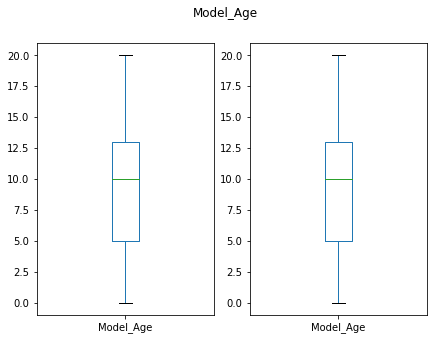

In [40]:
#explore outlyers for 
var_to_plot ='Model_Age'
fig, ax = plt.subplots(1,2,figsize=(7,5))
out_df[var_to_plot].plot.box(ax=ax[0])
out_df[var_to_plot].plot.box(ax=ax[1],showfliers =False)


fig.suptitle(var_to_plot)

In [71]:
# filterd_acv = out_df[var_to_plot]
# filterd_acv_round = filterd_acv


# filterd_acv_round_vc = filterd_acv_round.value_counts().to_frame().reset_index().rename({'index':'level' , var_to_plot:'count'}, axis=1)
# filterd_acv_round_vc.to_csv('csv/outly.csv', index=False)

Counts:
#>100k: 0


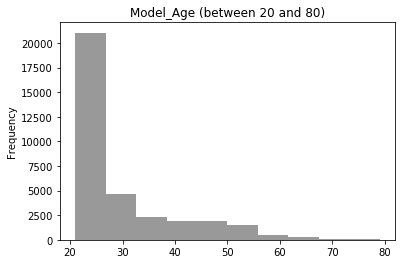

In [77]:
#histogram

s = 20
e = 80
#display modes of the distribution 
try:
    filterd_acv = out_df[var_to_plot].loc[(out_df[var_to_plot] >s )& (out_df[var_to_plot] <e)]

    print('Counts:\n#>100k:'
                ,len(out_df[var_to_plot].loc[out_df[var_to_plot]>=1e5]))

except:
    filterd_acv = out_df[var_to_plot]




n = 1
filterd_acv_round = (filterd_acv // n ) * n

filterd_acv.plot.hist(title= var_to_plot+f' (between {s} and {e})',color='k', alpha=.4)

filterd_acv_round_vc = filterd_acv_round.value_counts().to_frame().reset_index().rename({'index':'level' , var_to_plot:'count'}, axis=1)
filterd_acv_round_vc.to_csv('csv/outly.csv', index=False)
# filterd_acv_round_vc

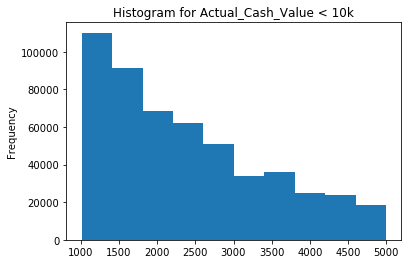

In [42]:


#plot a histogram of observed cash_values
fig= plt.figure()
ax = filterd_acv.plot.hist()
ax.set(title = 'Histogram for Actual_Cash_Value < 10k');





K-S p-value: 0.0


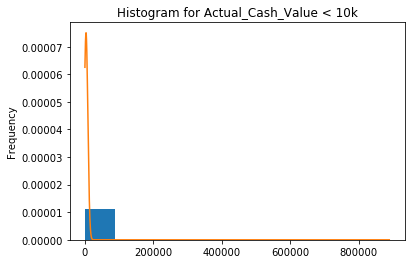

In [34]:
#fit  normat distribution

from scipy import stats

x = np.linspace(0,filterd_acv.max(),len(filterd_acv))
mu , std = stats.norm.fit(filterd_acv.values)

ax = filterd_acv.plot.hist(normed=True)
plt.plot(x, stats.norm.pdf(x , mu, std))
ax.set(title = 'Histogram for Actual_Cash_Value < 10k');
print('K-S p-value:', stats.kstest(filterd_acv.values , 'norm')[1])



In [ ]:

out_df['Model_Age'].describe().astype(int)

In [ ]:
#model_age
#check model age statsВ

out_df.loc[out_df['Model_Age'].loc[out_df['Model_Age']<0].index]

In [41]:

numerical_fields =  ['Actual_Cash_Value'
               ,'Auction_Year'
       #'Odometer'
       , 'Price_Sold_or_Highest_Bid'
       , 'Repair_Cost'
        ,'Odometer_Null','Odometer_Replace'
        ,'Model_Age'
        ]

categorical_variables = ['Prim_Damage','Make','Model'
]


In [42]:
#categories for all categorical variables 

# categorial_variables = ['Prim_Damage'
#                         ,'Sec_Damage'
#                         ,'Make'
#                         ,'Model' # - to many categories >2000
#
                        #  ]  
out_df[categorical_variables]  =out_df[categorical_variables].astype('category')

print(out_df[categorical_variables].describe().to_string(),'\n\n')

cat_df = {}
for col in categorical_variables:
    print(col, ' - ', out_df[col].cat.categories.tolist(),'\n')
    cat_df[col] = out_df[col].cat.categories.tolist()


RGER RT', 'CHARGER SE', 'CHARGER SR', 'CHARGER SU', 'CHARGER SX', 'CHARGER V6', 'CHEROKEE C', 'CHEROKEE L', 'CHEROKEE NAN', 'CHEROKEE S', 'CIRRUS LX', 'CIRRUS LXI', 'CIVIC 1.3', 'CIVIC DX', 'CIVIC DX V', 'CIVIC DX-G', 'CIVIC EX', 'CIVIC EX-L', 'CIVIC EXL', 'CIVIC GX', 'CIVIC HF', 'CIVIC HX', 'CIVIC HYBR', 'CIVIC HYBRID', 'CIVIC LX', 'CIVIC LX-S', 'CIVIC NAN', 'CIVIC NATU', 'CIVIC SE', 'CIVIC SI', 'CIVIC SPORT', 'CIVIC TOUR', 'CIVIC TOURING', 'CIVIC TYPE', 'CIVIC VP', 'CLA 250', 'CLA 250 4M', 'CLA 45 AMG', 'CLA NAN', 'CLARITY NAN', 'CLARITY TO', 'CLK 320', 'CLK 320C', 'CLK 350', 'CLK 430', 'CLK 500', 'CLK 55 AMG', 'CLK 550', 'CLK 63 AMG', 'CLK NAN', 'CLS 400', 'CLS 400 4M', 'CLS 500', 'CLS 500C', 'CLS 55 AMG', 'CLS 550', 'CLS 550 4M', 'CLS 55AMG', 'CLS 63 AMG', 'CLS CLASS', 'CLS NAN', 'COBALT 1LT', 'COBALT 2LT', 'COBALT LS', 'COBALT LT', 'COBALT LTZ', 'COBALT NAN', 'COBALT SPO', 'COBALT SPORT', 'COBALT SS', 'COLORADO L', 'COLORADO NAN', 'CONCORDE L', 'CONCORDE NAN', 'CONTINENTAL NAN', '

In [133]:
model_year_count = out_df['Model_Year'].value_counts()
print('total count:',out_df.shape[0],'\ntotal count (model_year >= 2000):', out_df.loc[out_df.Model_Year >=2000].shape[0])
model_year_count.head(20)Z

total count: 516218 
total count (model_year >= 2000): 516218


2007    40358
2006    39109
2008    38957
2005    37714
2004    34296
2003    34240
2012    30779
2013    30283
2015    27720
2014    27530
2002    27059
2010    26798
2009    24892
2011    22557
2016    20098
2001    19122
2017    14229
2000    13106
2018     6382
2019      989
Name: Model_Year, dtype: int64

In [134]:
out_df.columns

Index(['Actual_Cash_Value_adj', 'Auction_Date',
       'Price_Sold_or_Highest_Bid_adj', 'Prim_Damage', 'Repair_Cost_adj',
       'Sec_Damage', 'Model_Year', 'Make', 'Model', 'Auction_Year', 'County',
       'Odometer_Null', 'Odometer_Replace', 'Model_Age',
       'Original_MSRP_mean_adj', 'Unemp-Pct-2014', 'Unemp-Pct-2015',
       'Unemp-Pct-2016', 'Unemp-Pct-2017', 'Unemp-Pct-2018', 'Unemp-Pct-2013',
       'Unemp-Pct-2012', 'Unemp-Pct-2011', 'Unemp-Pct-2010', 'Income_adj-1990',
       'Income_adj-1991', 'Income_adj-1992', 'Income_adj-1993',
       'Income_adj-1994', 'Income_adj-1995', 'Income_adj-1996',
       'Income_adj-1997', 'Income_adj-1998', 'Income_adj-1999',
       'Income_adj-2000', 'Income_adj-2001', 'Income_adj-2002',
       'Income_adj-2003', 'Income_adj-2004', 'Income_adj-2005',
       'Income_adj-2006', 'Income_adj-2007', 'Income_adj-2008',
       'Income_adj-2009', 'Income_adj-2010', 'Income_adj-2011',
       'Income_adj-2012', 'Income_adj-2013', 'Income_adj-2014',
   

In [49]:
out_df_describe = out_df[numerical_fields].describe(percentiles =[.01,.25, .5, .75,.99]).T

out_df_describe.to_csv('csv/summary_statistics.csv')

out_df_describe

,count,mean,std,min,1%,25%,50%,75%,99%,max
Actual_Cash_Value,819535.0,11536.592956,11700.020399,100.00,1000.00,4852.0,8432.0,14431.0,53329.24,1000000.0
Auction_Year,1046013.0,2016.544108,2.057433,2010.00,2012.00,2015.0,2017.0,2018.0,2019.00,2019.0
Price_Sold_or_Highest_Bid,1046013.0,3394.153648,6108.664082,0.00,200.00,850.0,1800.0,3850.0,23600.00,2000000.0
Repair_Cost,379031.0,10611.051583,19446.762991,0.01,1000.00,6062.0,9211.0,13147.0,33482.80,9999999.0
Odometer_Null,655173.0,109568.464424,71581.695685,0.00,1865.72,53721.0,105797.0,155557.0,288842.56,9600091.0
Odometer_Replace,1036359.0,181184.552450,191909.799564,0.00,3108.00,80400.0,150886.0,251174.0,545326.00,9600091.0
Model_Age,1046013.0,10.406675,6.193305,0.00,1.00,6.0,10.0,14.0,29.00,95.0


In [50]:
#Correlation Analysis
corr_table = out_df[numerical_fields].corr()

corr_table.to_csv('csv/correlation.csv')

corr_table

,Actual_Cash_Value,Auction_Year,Price_Sold_or_Highest_Bid,Repair_Cost,Odometer_Null,Odometer_Replace,Model_Age
Actual_Cash_Value,1.000000,-0.076464,0.764365,0.235118,-0.515170,-0.282774,-0.429051
Auction_Year,-0.076464,1.000000,-0.081706,-0.007369,-0.033061,-0.005352,0.028857
Price_Sold_or_Highest_Bid,0.764365,-0.081706,1.000000,0.143551,-0.320186,-0.185632,-0.252514
Repair_Cost,0.235118,-0.007369,0.143551,1.000000,-0.141348,-0.079974,-0.180113
Odometer_Null,-0.515170,-0.033061,-0.320186,-0.141348,1.000000,1.000000,0.640057
Odometer_Replace,-0.282774,-0.005352,-0.185632,-0.079974,1.000000,1.000000,0.330150
Model_Age,-0.429051,0.028857,-0.252514,-0.180113,0.640057,0.330150,1.000000


In [ ]:
numerical_fields_bins = {'Actual_Cash_Value' : [],
'Price_Sold_or_Highest_Bid': [],
'Repair_Cost': [],
'Odometer_Null': [],
'Odometer_Replace': [],
'Model_Age': }

Actual_Cash_Value
1021.0                  1
9235.0                  1
1935.0                  1
1179.0                  1
2313.0                  1
...                   ...
48.0                 7973
40.0                 8025
84.0                 8623
50.0                 8655
85.0                10721

[1578 rows x 1 columns]
        Price_Sold_or_Highest_Bid
855.0                           1
2440.0                          1
1810.0                          1
865.0                           1
3490.0                          1
...                           ...
6.0                         40083
7.0                         41020
8.0                         42700
9.0                         43258
5.0                         44596

[522 rows x 1 columns]
        Repair_Cost
568.0             1
1264.0            1
1446.0            1
8342.0            1
1424.0            1
...             ...
65.0           3286
70.0           3339
50.0           3357
80.0           3372
100.0          3587

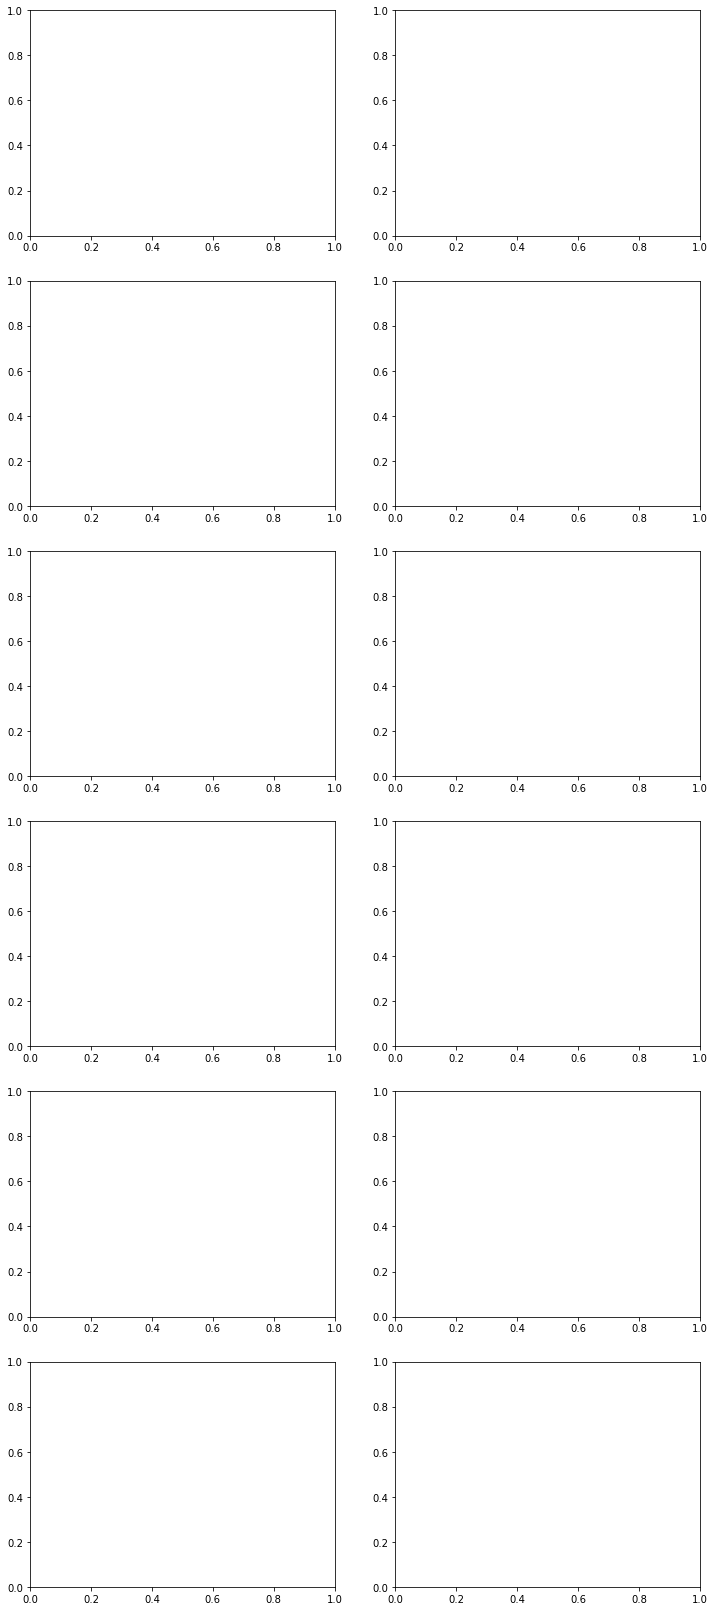

In [58]:
#histomgram for conitnuous variables
fig , axs = plt.subplots(len(numerical_fields) ,2, figsize=(12,29),sharex=False)


i=0
for var in numerical_fields:
    # hist_df_lb ,hist_df_hb = out_df[var].loc[lambda x: x <=3e4] , out_df[var].loc[lambda x: x >=1e4]
    df_to_print = (out_df[var] // 100).value_counts().to_frame().sort_values(by=var)
    df_to_print.to_csv(f'csv/{var}_hist.csv')
    print(df_to_print)
    # hist_df_lb.plot.hist(bins=10, ax= axs[i][0])
    # hist_df_hb.plot.hist(bins=10, ax= axs[i][1])
    
    # axs[i][0].set(title = var + ' <100k bin')
    # axs[i][1].set(title = var + ' >100k bin')
    i+=1

In [ ]:
#market size

market_size = out_df.groupby(out_df['Auction_Date'].dt.year)['Actual_Cash_Value'].sum()

market_size =  market_size / 1000000

print(market_size.to_string())
plt.figure(figsize=(10,4))
ax = market_size.plot.bar()
ax.set(title='Market Size', ylabel='$, millions');

In [26]:
out_df[categorical_variables]

from DataProcessing.DataStats import get_df_stats

get_df_stats(out_df[categorical_variables])

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,dtype
0,Prim_Damage,28,0.0,41.495469,category
1,Make,61,0.0,13.622010,category
2,Model,5553,0.0,1.605143,category


In [27]:
out_df.columns

Index(['Actual_Cash_Value', 'Auction_Date', 'Description', 'Location',
       'Odometer', 'Price_Sold_or_Highest_Bid', 'Prim_Damage', 'Repair_Cost',
       'Sec_Damage', 'Title_State_Type', 'Model_Year', 'Make', 'Model',
       'Model 2', 'State', 'City', 'Model 3', '2', '5', 'Auction_Year',
       'Odometer_Null', 'Odometer_Replace', 'Model_Age'],
      dtype='object')

In [28]:
#value distribution for Description 

desc_val_dist = out_df['Description'].value_counts()

desc_val_dist[:30]

2015 Nissan ALTIMA 2.5     2216
2008 Nissan ALTIMA 2.5     2062
2013 Nissan ALTIMA 2.5     1880
2003 Honda ACCORD EX       1801
2003 Toyota COROLLA CE     1777
2009 Nissan ALTIMA 2.5     1763
2007 Toyota CAMRY NEW      1722
2002 Toyota CAMRY LE/X     1706
2005 Toyota COROLLA CE     1686
2014 Ford FOCUS SE         1623
2006 Toyota COROLLA CE     1620
2004 Honda ACCORD EX       1585
2012 Honda CIVIC LX        1580
2013 Hyundai ELANTRA GL    1558
2014 Nissan ALTIMA 2.5     1474
2002 Toyota CAMRY LE       1434
2002 Ford EXPLORER X       1427
2003 Toyota CAMRY LE/X     1425
2005 Nissan ALTIMA S/S     1389
2012 Nissan ALTIMA 2.5     1388
2004 Toyota COROLLA CE     1381
2007 Toyota PRIUS          1376
2007 Nissan ALTIMA 2.5     1374
2007 Toyota COROLLA CE     1359
2007 Toyota CAMRY CE/L     1358
2005 Toyota PRIUS          1286
2008 Toyota PRIUS          1286
2008 Honda CIVIC LX        1254
2004 Ford EXPLORER X       1222
2003 Toyota CAMRY LE       1221
Name: Description, dtype: int64

In [29]:
#value distribution for Prim Damage 

prim_val_dist = out_df['Prim_Damage'].value_counts()

prim_val_dist[:30]

front end               434048
rear end                103914
mechanical              103634
minor dent/scratches     93381
side                     91479
normal wear              51918
water/flood              32590
all over                 32560
minor dents/scratche     24845
hail                     12041
rollover                 11996
damage history           11709
undercarriage             8624
partial repair            8282
vandalism                 6097
frame damage              4996
burn                      3890
top/roof                  3552
stripped                  2985
biohazard/chemical        1390
burn - interior            903
previous repair            386
rejected repair            345
biohazardous/chemica       150
missing/altered vin        114
no data                     92
replaced vin                91
cash for clunkers            1
Name: Prim_Damage, dtype: int64

In [38]:
#summary statistics conditions on Prim_Damage

cond_on_primd = out_df.groupby('Prim_Damage').agg(['mean','var']).stack().sort_index(level=1)
cond_on_primd.index = ['{} - {}'.format(j, i) for i, j in cond_on_primd.index]
cond_on_primd

,Actual_Cash_Value,Price_Sold_or_Highest_Bid,Repair_Cost,Auction_Year,Odometer_Null,Odometer_Replace,Model_Age
mean - all over,1.469950e+04,3.521528e+03,1.389206e+04,2016.044072,8.658300e+04,1.734443e+05,2.923769e+03
mean - biohazard/chemical,9.221682e+03,1.834730e+03,1.377615e+04,2017.617986,1.266577e+05,2.566484e+05,4.333569e+03
mean - biohazardous/chemica,1.393287e+04,2.655833e+03,1.625341e+04,2013.233333,9.979388e+04,2.223330e+05,2.667507e+03
mean - burn,1.126854e+04,2.244645e+03,1.090093e+04,2016.423393,1.118121e+05,2.506070e+05,4.218567e+03
mean - burn - interior,1.148300e+04,3.016833e+03,9.211041e+03,2016.258029,1.129260e+05,2.347045e+05,3.948365e+03
mean - cash for clunkers,NaN,7.000000e+02,NaN,2013.000000,1.608080e+05,1.608080e+05,1.033300e+04
mean - damage history,1.699361e+04,7.621507e+03,4.754454e+03,2015.223845,9.091769e+04,1.729313e+05,3.351686e+03
mean - frame damage,1.190855e+04,4.207191e+03,9.244182e+03,2015.536029,1.103394e+05,1.775490e+05,3.292694e+03
mean - front end,1.238371e+04,3.235141e+03,1.082183e+04,2016.772302,9.301068e+04,1.613002e+05,3.032305e+03
mean - hail,1.003654e+04,3.884383e+03,9.071336e+03,2016.591894,1.031261e+05,1.789854e+05,3.606496e+03


In [50]:
#summary statistics conditions on Make

cond_on_make = out_df.groupby('Make').agg(['mean','var']).stack().sort_index(level=1)
cond_on_make.index = ['{} - {}'.format(j, i) for i, j in cond_on_make.index]
cond_on_make.to_csv('csv/temp.csv')

In [49]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(cond_on_make)

   
mean - PORSCHE             3.778253e+04               1.501562e+04   
mean - ROLLS-ROYCE         7.702261e+04               3.227089e+04   
mean - SAAB                5.317178e+03               1.227450e+03   
mean - SATURN              4.702614e+03               1.084262e+03   
mean - SCION               7.985007e+03               1.983257e+03   
mean - SEADOO              6.868358e+03               2.635849e+03   
mean - SMART               7.463913e+03               2.384565e+03   
mean - SUBARU              1.201904e+04               2.639109e+03   
mean - TESLA               6.963529e+04               2.761288e+04   
mean - TOYOTA              1.016794e+04               3.456990e+03   
mean - VOLKSWAGEN          9.591125e+03               2.521444e+03   
mean - VOLVO               9.005077e+03               2.160797e+03   
mean - WABASH              1.740867e+04               4.383333e+03   
var - ACURA                9.339004e+07               1.451183e+07   
var - ALFA      

In [115]:
by_couny = (car_demo_joined.reset_index()
             .groupby('County')['index']
             .count().sort_values(ascending=False)
           )

print(by_couny.to_string())

County
Los Angeles, CA                67403
Harris, TX                     44080
Dallas, TX                     36341
Fulton, GA                     36250
Miami-Dade, FL                 34320
Sacramento, CA                 26656
San Bernardino, CA             25785
Suffolk, MA                    23504
Hartford, CT                   23053
Orange, NY                     22838
Contra Costa, CA               22044
Philadelphia, PA               19360
Denver, CO                     19061
Hennepin, MN                   18917
San Diego, CA                  17651
Lake, IL                       16618
Queens, NY                     16395
Fresno, CA                     15012
Allegheny, PA                  14770
Somerset, NJ                   14647
Cook, IL                       14629
Maricopa, AZ                   13197
Marion, IN                     12772
Peoria, IL                     12660
Orange, FL                     11412
Hillsborough, FL               11323
Gloucester, NJ                 

In [0]:
plt.figure()
ax = by_couny[:20].plot.bar()
ax.set(title='Top 20 Counties by # records',ylabel='# observations');

In [0]:
#categories for all categorical variables 
# categorial_variables = ['Prim_Damage'
#                         ,'Sec_Damage'
#                         ,'Make'
#                         ,'Model' # - to many categories >2000
#
                        #  ]  
out_df[categorial_variables]  =out_df[categorial_variables].astype('category')

print(out_df[categorial_variables].describe().to_string(),'\n\n')

cat_df = {}
for col in categorial_variables:
    print(col, ' - ', out_df[col].cat.categories.tolist(),'\n')
    cat_df[col] = out_df[col].cat.categories.tolist()
